# Digital signal processing - 3

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Author ** | Alexander Kapitanov |
| ** Contact ** | sallador@bk.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, and also knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib, and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

## Convolution and correlation

In real problems, the question is often raised about the degree of similarity of one process to another, or about the independence of one process from another. In other words, it is required to determine the relationship between the signals, that is, to find the correlation.

Correlation methods are used in a wide range of tasks: signal search, computer vision and image processing, in radar tasks to determine the characteristics of targets and determine the distance to an object. In addition, correlation searches for weak signals in noise.

In the signal filtering section, the concept of the filter impulse response was introduced. Recall that the ** impulse response ** $ h(n) $ is the circuit's response to the input in the form of a Dirac function (δ-function). It reflects the effect of the circuit on the signal.

In the problems of passing signals through various digital nodes, the signal is convolved with the impulse response of the filter.

*Correlation* between two signals can be calculated as the sum of the products of pairs of samples of the signals under investigation.

If we take two absolutely independent random sequences, then their sum of products tends to zero. These signals are said to have zero correlation. Moreover, the longer the sequence, the more the result tends to zero.

Correlation is ** positive ** and ** negative **. Positive correlation - large values ​​of one signal are associated with large values ​​of another signal (an increase in one variable is related to an increase in another variable). The easiest way to understand negative correlation is that an increase in one variable is associated with a decrease in another variable.

Cross-correlation formula:

$ r_{12} = \frac{1}{N} \sum_{n=0}^{N-1}x_1(n)x_2(n)$

The normalizing factor $ \frac {1} {N} $ is used to exclude the influence of the duration of the sequences.

In terms of the signal function space, the correlation can be expressed as the cosine of the angle between vectors. Consequently, with a complete coincidence of signals, the degree of their connection will take on a positive unity value, with a complete opposite of the signals, a negative unity, and with a complete mismatch, a zero value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft, ifft

%matplotlib inline

Let's give examples of signals and find the correlation between them

Positive correlation:

In [2]:
# signal x1(n)
x1 = np.array([1, 2, 3, 4, 5])

# correlation
np.correlate(x1, x1, mode='valid')

array([55])

In [3]:
# signal x1(n)
x1 = np.array([1, 2, 3, 4, 5])

# correlation via sum
np.sum(x1*x1)

55

As you can see, the built-in function `correlate()` for matching signals calculates the sum of the products, which is completely consistent with the formula.

Negative correlation:

In [4]:
# signal x2(n)
x2 = -1 * np.array([1, 2, 3, 4, 5])

# correlation
np.correlate(x1, x2, mode='valid')

array([-55])

Different signals:

In [5]:
# signal x1(n), x2(n)
x1 = np.ones(5)      # [1, 1, 1, 1, 1]
x2 = np.arange(5)    # [0, 1, 2, 3, 4]

# correlation
np.correlate(x1, x2, mode='valid')

array([10.])

In [6]:
np.sum(x1*x2)   # correlation as sum of products

10.0

In practice, when two signals are correlated, their relative position in time is unknown. Signals can have the same shape, but are delayed relative to each other. In this regard, in order to establish the maximum correlation, it must be found for several delays.

### Random signals

Let's find the correlation of two pseudo-random processes.

The `seed()` parameter specifies the initial condition for the random process. If you set any number, then when you call any function of the random number, a predefined set of numbers (pseudo-random) will be generated.

Using the `randint()` method from the `numpy.random` library, set a random sequence of integers.

Random processes with zero correlation:

No correlation, r12 = [0].


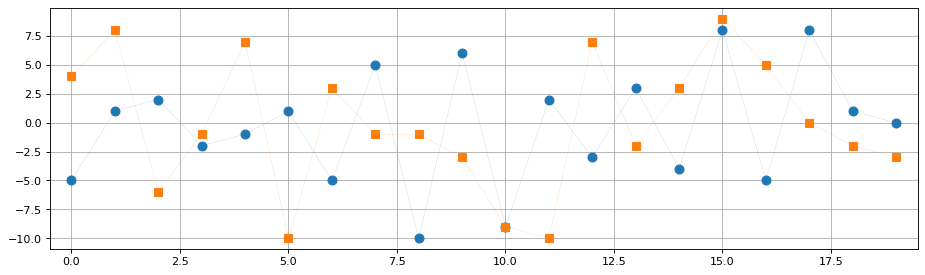

In [7]:
N = 20
# No correlation. Seed for all random process
np.random.seed(1)
x1 = np.random.randint(-10, 10, N)
x2 = np.random.randint(-10, 10, N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.1, markersize=8)
plt.plot(x2, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print('No correlation, r12 = {}.'.format(r12))

Random processes with non-zero correlation:

Correlation, r12 = [-164].


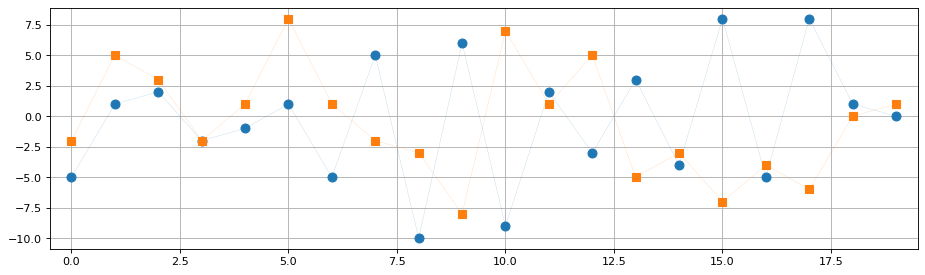

In [8]:
N = 20
# Correlation
np.random.seed(1)
x1 = np.random.randint(-10, 10, N)
np.random.seed(2)
x2 = np.random.randint(-10, 10, N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.1, markersize=8)
plt.plot(x2, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print('Correlation, r12 = {}.'.format(r12))

The filtering property of the ** delta function ** in the process of calculating the correlation allows you to find the signal value at the moment when the delta function is not equal to 0:

Correlation, r12 = [-1.79343559].


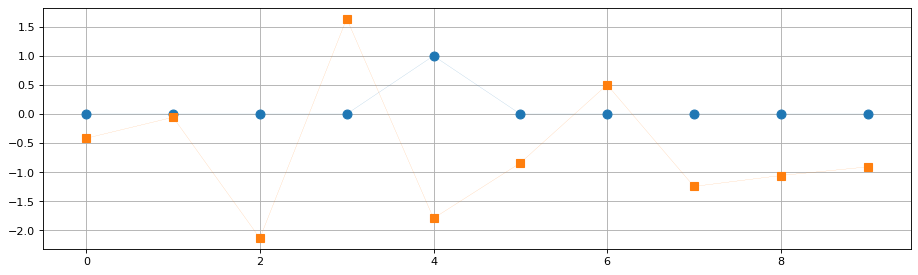

In [9]:
N = 10
# delta-function
x1 = np.zeros(N)
x1[4] = 1
# random signal
np.random.seed(2)
x2 = np.random.randn(N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.1, markersize=8)
plt.plot(x2, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print('Correlation, r12 = {}.'.format(r12))

### Autocorrelation function

Autocorrelation function (ACF) - shows the relationship between the signal and its copy, shifted in time.

ACF finds application in coding information. The choice of the coding sequence in terms of length, frequency and shape is largely due to the correlation properties of this sequence. The best code sequence has the lowest probability of false detection or triggering (for signal detection, for threshold devices) or false synchronization (for transmitting and receiving code sequences).

The autocorrelation function helps to find repeating areas in a time sequence; using the ACF, you can find the carrier frequency of the signal.

Since the ACF is the product of a signal and its copy, the physical meaning of the ACF is the signal energy. In particular, at the zero time instant (`n = 0`), the ACF is equal to the signal energy.

There is no built-in autocorrelation function in numpy, but it's easy to write one yourself based on the `correlate ()` function.

### Properties of ACF

1. ACF is a symmetric and even function.
3. Has a maximum at zero.
4. ACF of periodic sequence - periodic function.
5. ACF of the sum of two uncorrelated signals - the sum of the ACF of these signals.
6. The ACF of infinite in time white noise has a peak at zero value and zeros in all others.

### ACF rectangular pulse

Example: A square wave autocorrelation function is a triangular waveform. It will be shown below that correlation and convolution of a signal with itself gives the same result.

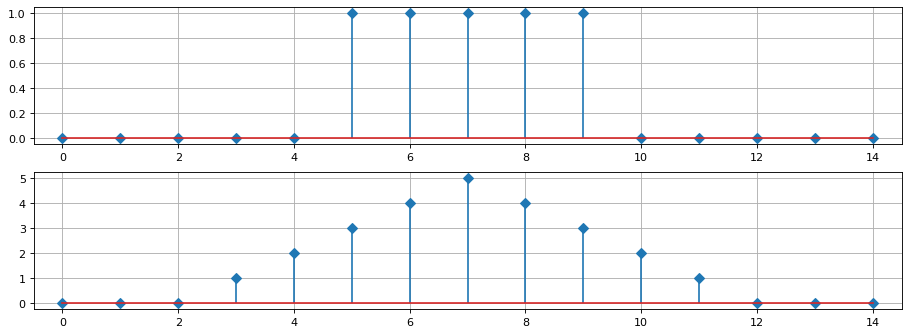

In [10]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res  # / np.max(res)

# Signal
x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(5)])

# ACF
cfx = auto_corr(x)

xl = [x, cfx]

# Pot results
plt.figure(figsize=(14, 5), dpi=80)
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.stem(xl[i], linefmt='C0', markerfmt='D', use_line_collection=True)
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

Since the calculation of the ACF by the direct method is a labor-intensive operation (a large number of multiplication and addition operations) performed in $ O (N ^ 2) $, in many problems the question arises of a decrease in the quality of correlation properties due to a decrease in the length of the sequence. However, using the Fast Fourier Transform (FFT), the computational complexity can be reduced to $ O (Nlog (N) $.

Using the Wiener-Khinchin theorem, which links the ACF of a signal and its spectral power density, it is possible to calculate the ACF by taking a double FFT of the signal.

$ \Psi (\tau) = Re [IFFT (| FFT (x) | ^ 2)] $

____

## Convolution

** Convolution ** describes the interaction of signals with each other. If one of the signals is the impulse response of the filter, then the convolution of the input sequence with the impulse response is nothing more than the response of the circuit to the input action. In other words, the resulting signal reflects the passage of the signal through the filter.

Typically, the output signal is a lagging (relative to the input) function. In addition, the output signal can be boosted or suppressed relative to the input signal.

** To find the impulse response of a digital filter, it is necessary to apply a single pulse (delta function) to its input, which is equal to 1 at one point and equal to 0 at all other points **

### Convolution and correlation

The connection between convolution and correlation is quite simple: convolution is equivalent to the cross-correlation of two sequences, one of the sequences being reversed in time relative to the other. In the case of correlation, the sequences must be the same length. In the case of convolution, the sequences can have different lengths, then this process is called linear convolution. If the lengths of the sequences coincide, this is a cyclic (circular) convolution.

### Convolution properties

1. ** Commutability **:

$ a * b = b * a $

The following statement follows from this expression:

$ \sum_{m = 0} ^ {N-1} a (m) b (n-m) = \sum_{m = 0} ^ {N-1} a (n-m) b (n) $


2. ** Distribution **:

$ a * (b + c) = a * b + a * c $

3. ** Associativity **:

$ a * (b * c) = (a * b) * c = (a * c) * b $


There are two types of convolution - linear and cyclic (circular).

## Linear convolution

Linear convolution of two signals $ a(n) $, where $ n = 0, ..., N-1 $ and $ b(n) $, where $ n = 0, ..., M-1 $ is described by the equation:

$ s(n) = a * b = \sum_ {m = 0} ^ {n} a (m) \cdot b(n-m) $

Where
- $ n = 0, ..., N + M-2 $,
- $ N $ - signal length $ a(n) $,
- $ M $ - signal length $ b(n) $,

Convolution computation is an iterative process in which signals are shifted relative to each other, then multiplied and added. It is assumed that the signals are equal to zero outside their specified ranges, that is, $ a(n) = 0 $ for $ N <n <0 $ and $ b(n) = 0 $ for $ M <n <0 $.

Let's use the following example to calculate the convolution of signals step by step:

`a(n) = [1, 2, 3, 4], N = 4`

`b(n) = [3, 2, 1], M = 4`

The simplest algorithm (through circular convolution):

1. Supplement the first signal with zeros on the left to length N + M-1.
2. Invert the second signal in time.
3. Supplement the second signal with zeros on the right to the length N + M-1.
4. In a cycle from 0 to N + M-2, shift the second signal to the right (or the first signal to the left)
5. We calculate the products of elements at each step of the cycle and calculate the sum of the products.

Let's compare the obtained result and the values ​​calculated using the built-in function `convolve()` with the parameter `mode = 'full' '.

In [11]:
# input parameters
N, M = 4, 3

# lists of data
a = [1, 2, 3, 4]
b = [3, 2, 1]

# signals
an = np.concatenate([np.zeros(M-1, dtype=int), a])
bn = np.concatenate([b[::-1], np.zeros(N-1, dtype=int)])
print('a(n) = ', a)
print('b(n) = ', b)

# Convolution with 'same' mode with list comprehension:
ab = np.array([np.sum(an * np.roll(bn, i)) for i in range(N+M-1)])

# simple way:
# ab = []
# for i in range(N+M-1):
#     br = np.roll(bn, i)    # shift second signal
#     sm = np.sum(an * br)   # calc sum of prods
#     ab.append(sm)          # append new value to the list

# Function convolution:
print('\na(n) * b(n) = ', ab)

# Convolution with np.convolve method:
cv = np.convolve(a,b, mode='full')
print('np.convolve = ', cv)

# Check conv method:
ab_check = np.all(ab == cv)
print(ab_check)

a(n) =  [1, 2, 3, 4]
b(n) =  [3, 2, 1]

a(n) * b(n) =  [ 3  8 14 20 11  4]
np.convolve =  [ 3  8 14 20 11  4]
True


### Step-by-step explanation of linear convolution

It is important to remember that the second signal is first inverted from left to right, according to the convolution formula!

```
Step 1:
a = [0, 0, 1, 2, 3, 4]
b = [1, 2, 3, 0, 0, 0]

sum of prod = [3]

Step 2:
a = [0, 0, 1, 2, 3, 4]
b = [0, 1, 2, 3, 0, 0]

sum of prod = 1*2 + 2*3 = [8]

Step 3:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Step 5:
a = [0, 0, 1, 2, 3, 4]
b = [3, 0, 0, 0, 1, 2]

sum of prod = 1*3 + 2*4 = [11]

Step 6:
a = [0, 0, 1, 2, 3, 4]
b = [2, 3, 0, 0, 0, 1]

sum of prod = 1*4 = [4]

Convolution seq = [3, 8, 14, 20, 11, 4]
``` 

### Convolution of a rectangular pulse

The convolution of a rectangular pulse with itself degenerates into a triangular waveform. As shown above, for the autocorrelation function, the result is similar:

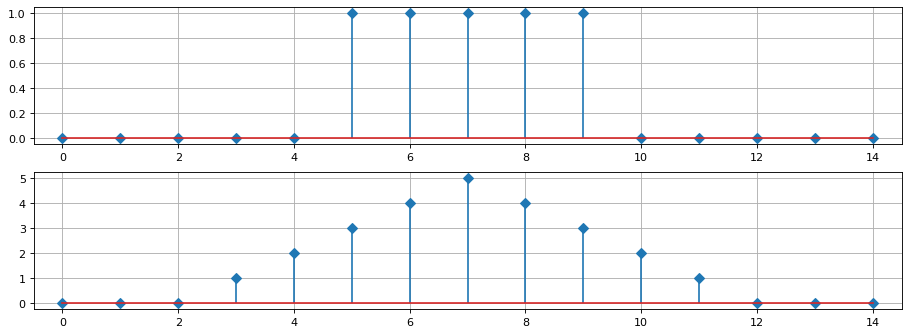

In [12]:
# Signal
x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(5)])

# Convolution
cv = np.convolve(x, x, mode='same')
xl = [x, cv]

# Pot results
plt.figure(figsize=(14, 5), dpi=80)
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.stem(xl[i], linefmt='C0', markerfmt='D', use_line_collection=True)
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

## Cyclic convolution

Cyclic (circular) convolution differs from linear convolution in that the input signals have the same duration $ N $.

The cyclic convolution of two signals $ a(n) $ and $ b(n) $, where $ n = 0, ..., N-1 $, is described by the equation:

$ s(n) = a * b = \sum_ {m = 0} ^ {N-1} a (m) \cdot b (n-m) $

where $ n = 0, ..., N-1 $, and the number $ N $ is the length of the signal $ a(n) $. As you can see, the result of the cyclic convolution has length N.


Let's use the following example to calculate the convolution of signals step by step:

`a(n) = [1, 2, 3, 4]`

`b(n) = [3, 2, 1, 0]`

Algorithm:

1. Invert the second signal,
2. In a cycle from 0 to N-1, shift the second signal to the right (or the first signal to the left)
3. We calculate at each step of the cycle the products of elements and calculate the sum of the products.

This result does not match the built-in method `convolve ()` with the parameter `mode = 'same' 'due to the fact that the numpy library uses zero padding for this method.

In [13]:
# Input parameters
N = 4

# Signals
an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)
print('a(n) = ', an)
print('b(n) = ', bn)

# Convolution with list comprehension:
ab = np.array([np.sum(an * np.roll(bn[::-1], i+1)) for i in range(N)])

# simple way:
# ab = []
# for i in range(N):
#     br = np.roll(bn, i+1)  # shift second signal
#     sm = np.sum(an * br)   # calc sum of prods
#     ab.append(sm)          # append new value to the list

# Function convolution:
print('a(n) * b(n) = ', ab)

a(n) =  [1 2 3 4]
b(n) =  [3 2 1 0]
a(n) * b(n) =  [14 12 14 20]


### Step-by-step explanation of cyclic folding

The first step is to invert the signal b (n) and start from -1 count

```
Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 
____


Due to the fact that the numpy library does not have a built-in function for computing circular convolutions, you can use the Fourier transform property.

### FFT convolution

From previous courses on the Fourier transform, the rule is known:

** Convolution of two signals in the time domain is equal to the product of their spectra in the frequency domain **

$ a(n) * b(n) = A(k) \cdot B(k) $

Using this rule, it is possible to compute the cyclic convolution of the two signals.

In [14]:
# Convolution with IFFT of FFT(a) * FFT(b)
def circle_conv(an, bn):
    """
    Calculate circular convolution via FFTs. 
    Signals an & bn must have same shape.
    You should import fft and ifft from scipy.fftpack.
    
    Parameters
    ----------
    an : np.array
        real 1D numpy array
    bn : np.array
        real 1D numpy array
    """
    return np.real(ifft(fft(an) * fft(bn)))


# Input parameters
N = 4

# Signals
an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)

# Calculate circular convolution
cv = circle_conv(an, bn)

print('circular convolution = ', cv)

# Check conv method
ab_check = np.all(ab == cv)
print(ab_check)

circular convolution =  [14. 12. 14. 20.]
True


Computing the FFT convolution has a number of advantages, one of which is related to the number of operations performed during the computation.

For example, signal $ a(n) $ has length $ N = 2000 $, and signal $ b(n) $ has length $ M = 8000 $. Calculating linear convolution will require $ N * M = 16,000,000 $ multiplication and addition operations.

However, if both sequences are supplemented to $ N_{FFT} = 8192 $, then the FFT requires $ N \cdot log_{2} (N) \approx 106.000 $ complex multiplications (or 4 times more real multiplications).

From the formula for calculating FFT convolution, it is clear that three FFTs are required: two forward FFTs for the input signals and one inverse FFT for the product of the signal spectra. Complex multiplications of spectra make an insignificant contribution (8192 complex multiplications), so the resulting estimated value of the number of operations is $ 3 \cdot 4 \cdot N \cdot log_ {2} (N) \approx 1.280.000 $

The resulting value is ** 12.5 ** times less than if you had to calculate the linear convolution using the formula from the definition.

### Efficiency Comparison

Below is a table comparing the efficiency of fast convolution and convolution calculated by the straightforward formula. The table compares the number of real multiplications required to compute the convolution.

As you can see, for FFT lengths up to 64, fast convolution loses to the direct method. However, with an increase in the FFT length, the results change in the opposite direction - fast convolution begins to outperform the direct method. Moreover, the longer the FFT length, the better the gain.

| ** N ** | ** Direct method ** | ** Quick Convolution ** | ** Attitude ** |
| --- | --- | --- | --- | 
| 8   | 64  | 448    | 0.14 |
| 16  | 256 | 1088   | 0.24 |
| 32  | 1K  | 2560   | 0.4  |
| 64  | 4K  | 5888   | 0.7  |
| 128 | 16K | 13312  | 1.23 |
| ... | ... | ...    | ...  |
| 2K  | 4M  | 311296 | 13.5 |

____

### List of functions from the signal package:

Below is a list of basic functions from the ** scipy ** package related to convolution and correlation.

** Convolution and correlation **


| ** Function ** | ** Description ** |
| --- | --- |
| `convolve(in1, in2 [, mode, method])` | Convolution of two N-dimensional arrays |
| `correlate(in1, in2 [, mode, method])` | Cross-correlation of two N-dimensional arrays |
| `fftconvolve(in1, in2 [, mode, axes])` | FFT convolution of two N-dimensional arrays |
| `convolve2d(in1, in2 [, mode, boundary, fillvalue])` | Convolution of two 2-dimensional arrays |
| `correlate2d(in1, in2 [, mode, boundary, ...])` | Correlation of two 2-dimensional arrays |
| `sepfir2d(input, hrow, hcol)` | Convolution of an array of rank 2 with a filter characteristic of rank 1. The function can be used to search for an image by its B-spline representation. |
| `choose_conv_method(in1, in2 [, mode, measure])` | Finding the Fastest Correlation or Convolution Method |

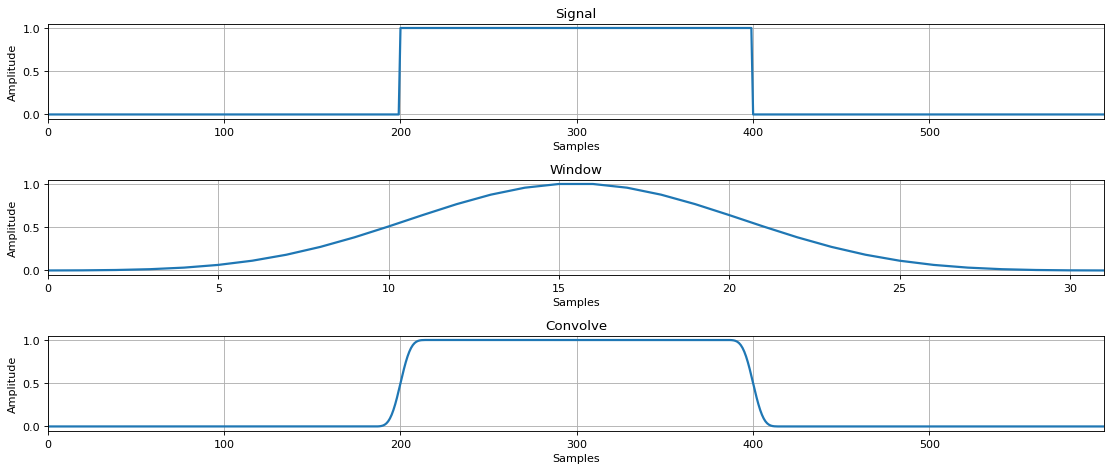

In [15]:
from scipy import signal

# Signal
sig = np.repeat([0., 1., 0.], 200)
# Window
win = signal.kaiser(32, beta=11)
# Filter by using convolve
fil = signal.convolve(sig, win, mode='same') / np.sum(win)

# list of frequencies
f_list = [sig, win, fil]
t_list = ['Signal', 'Window', 'Convolve']
# Plot
plt.figure(figsize=(14, 6), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.0)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, f_list[i].size-1])
    plt.grid()
plt.tight_layout()